In [1]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')

In [2]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values

In [4]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split     

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)   

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2022-12-03 20:27:33.856112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6894 - accuracy: 0.5000 - val_loss: 0.6842 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5000 - val_loss: 0.6820 - val_accuracy: 0.5479
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5010 - val_loss: 0.6800 - val_accuracy: 0.5525
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5010 - val_loss: 0.6779 - val_accuracy: 0.5525
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5029 - val_loss: 0.6759 - val_accuracy: 0.5571
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5117 - val_loss: 0.6738 - val_accuracy: 0.5708
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5225 - val_loss: 0.6718 - val_accuracy: 0.5890
Epoch 8/100
3

In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8493


0.8493150472640991

In [21]:
import matplotlib.pyplot as plt

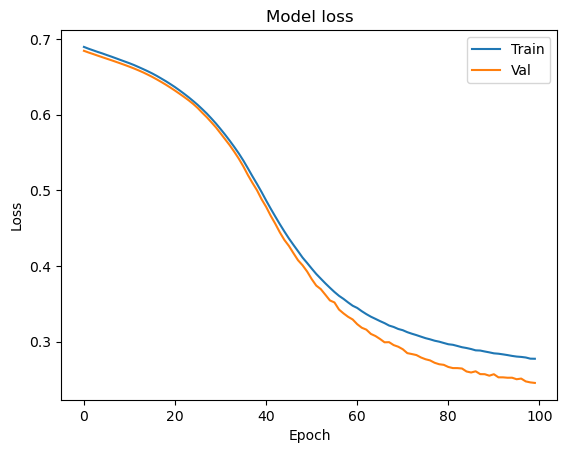

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

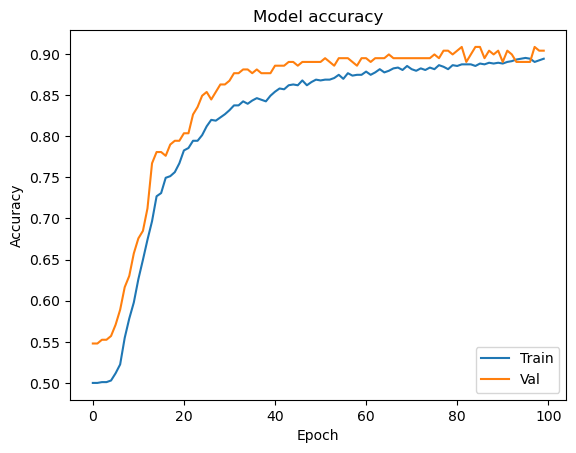

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 36ms/step - loss: 0.4608 - accuracy: 0.7798 - val_loss: 0.3962 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3609 - accuracy: 0.8493 - val_loss: 0.2510 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3723 - accuracy: 0.8513 - val_loss: 0.3093 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3122 - accuracy: 0.8757 - val_loss: 0.2594 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2798 - accuracy: 0.8894 - val_loss: 0.2932 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2694 - accuracy: 0.8914 - val_loss: 0.2594 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2739 - accuracy: 0.8904 - val_loss: 0.2901 - val_accuracy: 0.8767
Epoch 

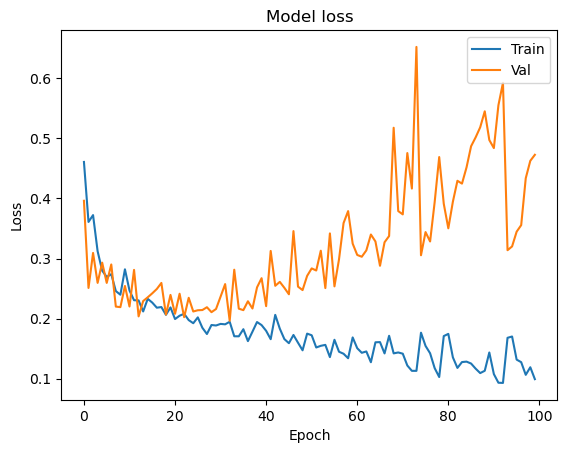

In [29]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

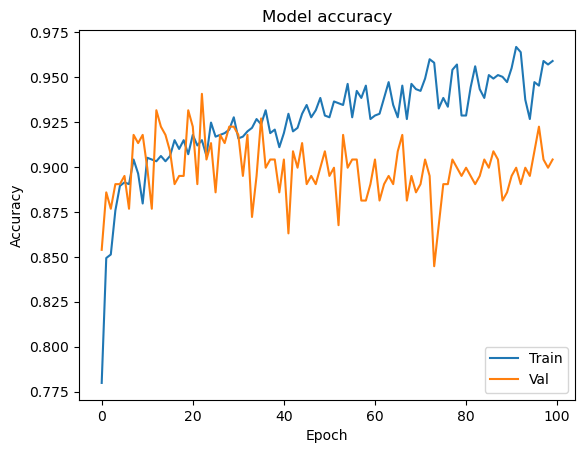

In [30]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 48ms/step - loss: 14.2450 - accuracy: 0.6360 - val_loss: 3.9106 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 1.6650 - accuracy: 0.8503 - val_loss: 0.6270 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5698 - accuracy: 0.8620 - val_loss: 0.5076 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5150 - accuracy: 0.8542 - val_loss: 0.5480 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.5140 - accuracy: 0.8650 - val_loss: 0.4729 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4886 - accuracy: 0.8728 - val_loss: 0.4331 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4975 - accuracy: 0.8767 - val_loss: 0.6127 - val_accuracy: 0.7854
Epoch

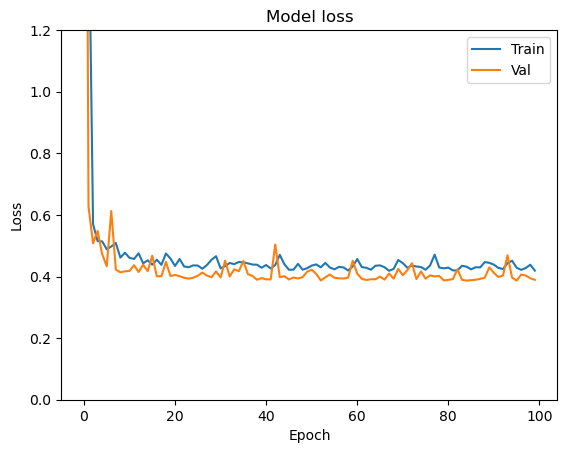

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

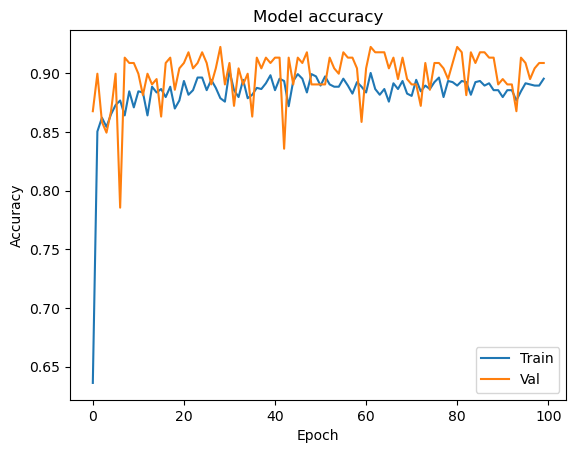

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()